# 📊 Análisis Simplificado: Absorbancia y Reflectancia

**CafeLab - Análisis Funcional**  
**Autor:** Liz  
**Fecha:** 12 Enero 2025  


In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Configurar matplotlib
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [2]:
# Cargar y procesar datos
nombre_col = ['Illy','Mucilago','Cafeina','Ox','Mi','Ch','Go','Verde']

try:
    # Cargar datos
    file = pd.read_csv('reflectancia2025.csv', engine='python', nrows=2314)
    print(f"✅ Datos cargados: {file.shape}")
    
    # Eliminar primera fila (headers)
    file = file.drop(index=0).reset_index(drop=True)
    
    # Invertir orden (menor a mayor wavelength)
    file = file.iloc[::-1].reset_index(drop=True)
    
    print("✅ Datos procesados correctamente")
    
except Exception as e:
    print(f"❌ Error: {e}")

✅ Datos cargados: (2313, 33)
✅ Datos procesados correctamente


In [3]:
# Extraer datos de reflectancia
columnas_impares = file.columns[1::2]  # Solo columnas impares

# Crear dataframe limpio
file2 = file[columnas_impares].copy()
file2 = file2.drop(columns=['Unnamed: 1','Unnamed: 19', 'Unnamed: 21', 'Unnamed: 23', 'Unnamed: 25',
                           'Unnamed: 27', 'Unnamed: 29', 'Unnamed: 31'], errors='ignore')

# Renombrar columnas
file2.columns = nombre_col

# Agregar wavelength
file2.insert(0, 'Wavelength', file['Baseline 100%T'])

print("📊 Estructura de datos:")
print(f"Shape: {file2.shape}")
print(f"Columnas: {list(file2.columns)}")
print("\nPrimeras 3 filas:")
file2.head(3)

📊 Estructura de datos:
Shape: (2312, 9)
Columnas: ['Wavelength', 'Illy', 'Mucilago', 'Cafeina', 'Ox', 'Mi', 'Ch', 'Go', 'Verde']

Primeras 3 filas:


,Wavelength,Illy,Mucilago,Cafeina,Ox,Mi,Ch,Go,Verde
0,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,190,39.9671669,44.59405136,96.77281189,49.10914993,53.6247139,56.10119247,49.2641716,57.66826248
2,191,42.80335236,44.50233841,94.1362381,49.98532104,54.11322021,56.54802322,59.62401581,56.56570053


In [4]:
# Convertir a numérico TODAS las columnas
print("🔧 Convirtiendo a valores numéricos...")

# Convertir Wavelength
file2['Wavelength'] = pd.to_numeric(file2['Wavelength'], errors='coerce')

# Convertir muestras
for col in nombre_col:
    file2[col] = pd.to_numeric(file2[col], errors='coerce')
    print(f"  {col}: ✅")

# Rellenar valores NaN con 0.001
file2 = file2.fillna(0.001)

print("\n✅ Conversión completada")
print("Tipos de datos:")
print(file2.dtypes)

🔧 Convirtiendo a valores numéricos...
  Illy: ✅
  Mucilago: ✅
  Cafeina: ✅
  Ox: ✅
  Mi: ✅
  Ch: ✅
  Go: ✅
  Verde: ✅

✅ Conversión completada
Tipos de datos:
Wavelength      int64
Illy          float64
Mucilago      float64
Cafeina       float64
Ox            float64
Mi            float64
Ch            float64
Go            float64
Verde         float64
dtype: object


In [5]:
# Conversión a Absorbancia
print("🔬 Convirtiendo Reflectancia → Absorbancia")

file_abs = file2.copy()

# Aplicar conversión A = 2 - log10(R)
for col in nombre_col:
    # Asegurar valores positivos y > 0
    file_abs[col] = np.where(file_abs[col] <= 0, 0.001, file_abs[col])
    
    # Aplicar fórmula
    file_abs[col] = 2 - np.log10(file_abs[col])
    
    print(f"  {col}: ✅ (min={file_abs[col].min():.3f}, max={file_abs[col].max():.3f})")

print("\n✅ Conversión a absorbancia completada")
print("📋 Fórmula: A = 2 - log₁₀(R)")

🔬 Convirtiendo Reflectancia → Absorbancia
  Illy: ✅ (min=0.011, max=5.000)
  Mucilago: ✅ (min=-0.070, max=5.000)
  Cafeina: ✅ (min=-0.032, max=5.000)
  Ox: ✅ (min=0.016, max=5.000)
  Mi: ✅ (min=0.022, max=5.000)
  Ch: ✅ (min=0.037, max=5.000)
  Go: ✅ (min=0.038, max=5.000)
  Verde: ✅ (min=-0.023, max=5.000)

✅ Conversión a absorbancia completada
📋 Fórmula: A = 2 - log₁₀(R)


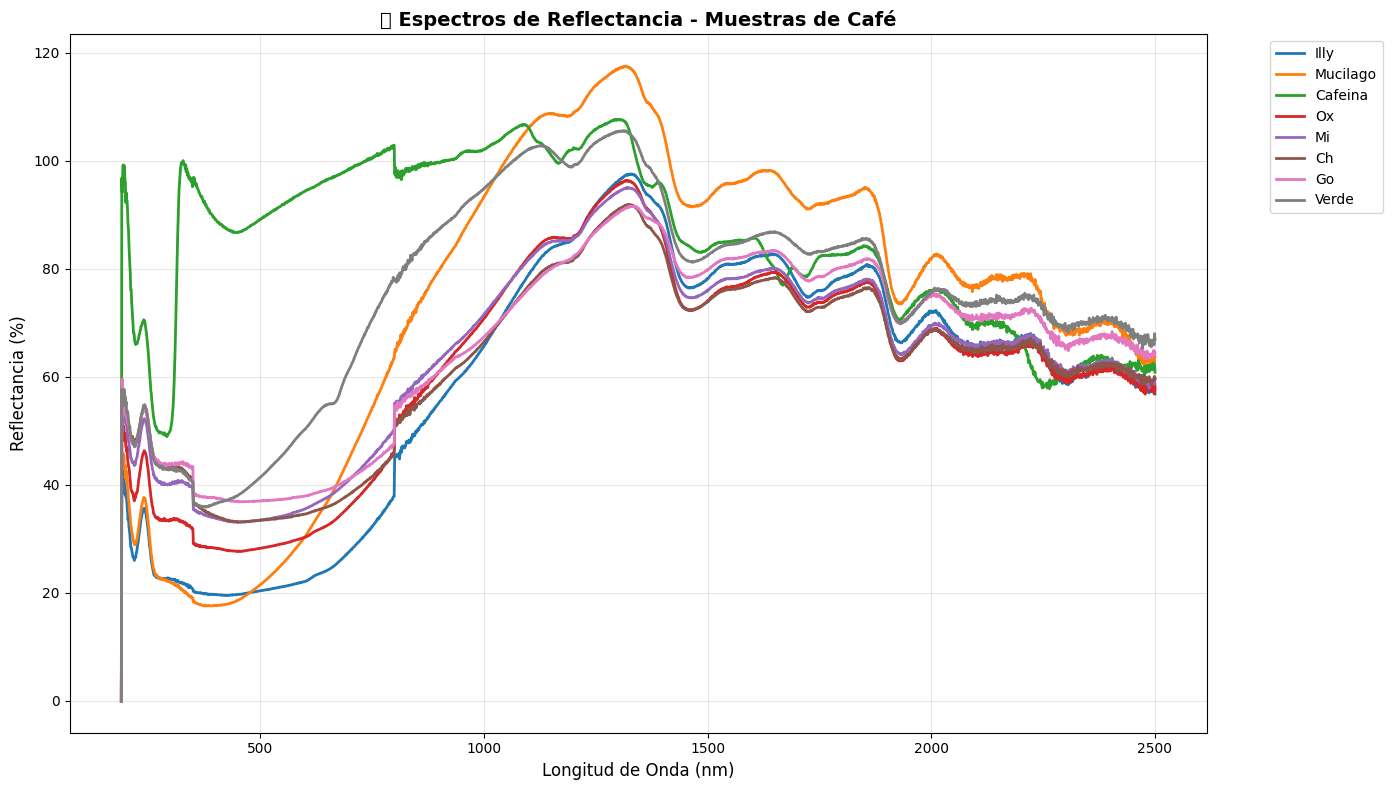

📈 Gráfica de reflectancia creada


In [6]:
# Gráfica de Reflectancia
plt.figure(figsize=(14, 8))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

for i, col in enumerate(nombre_col):
    plt.plot(file2['Wavelength'], file2[col], 
             label=col, color=colors[i], linewidth=2)

plt.xlabel('Longitud de Onda (nm)', fontsize=12)
plt.ylabel('Reflectancia (%)', fontsize=12)
plt.title('📊 Espectros de Reflectancia - Muestras de Café', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📈 Gráfica de reflectancia creada")

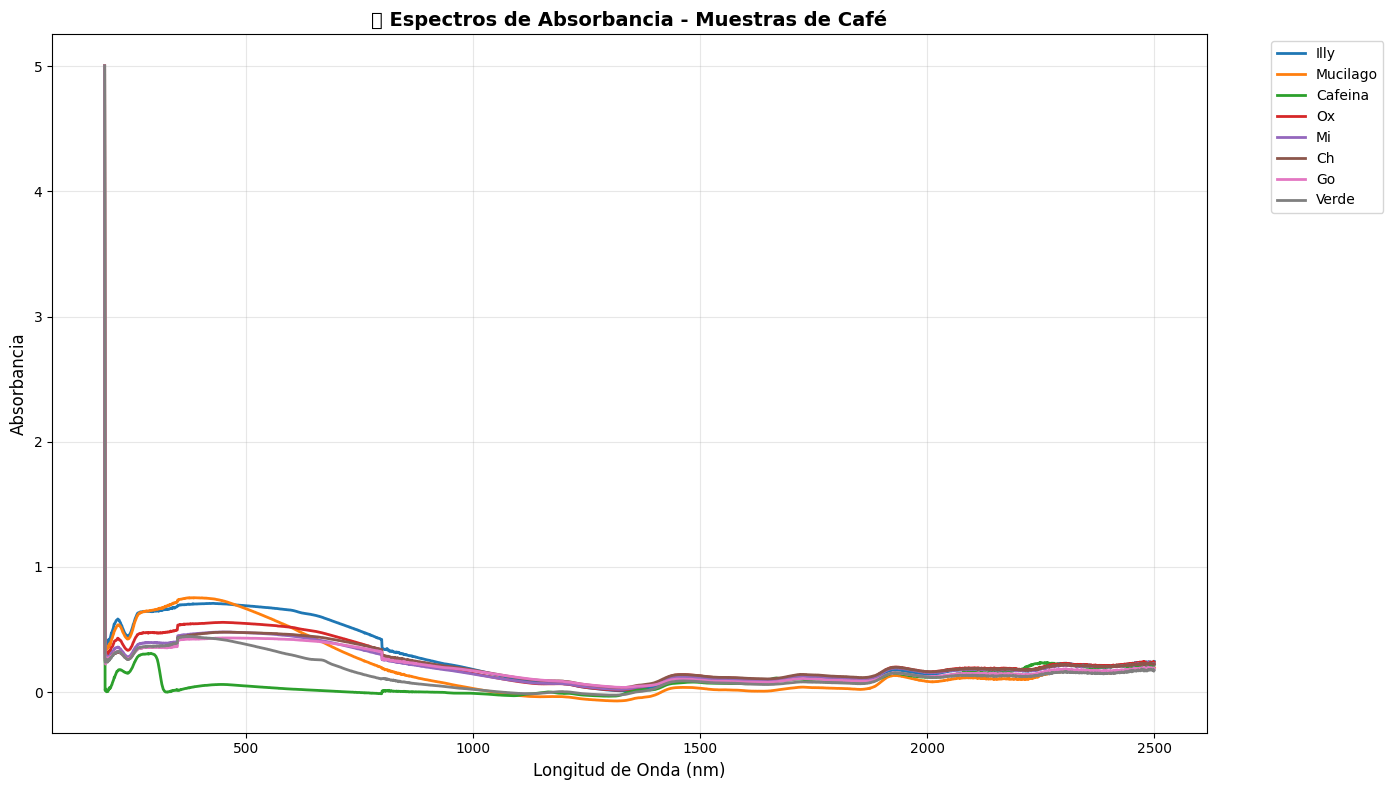

📈 Gráfica de absorbancia creada


In [7]:
# Gráfica de Absorbancia
plt.figure(figsize=(14, 8))

for i, col in enumerate(nombre_col):
    plt.plot(file_abs['Wavelength'], file_abs[col], 
             label=col, color=colors[i], linewidth=2)

plt.xlabel('Longitud de Onda (nm)', fontsize=12)
plt.ylabel('Absorbancia', fontsize=12)
plt.title('🔬 Espectros de Absorbancia - Muestras de Café', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📈 Gráfica de absorbancia creada")

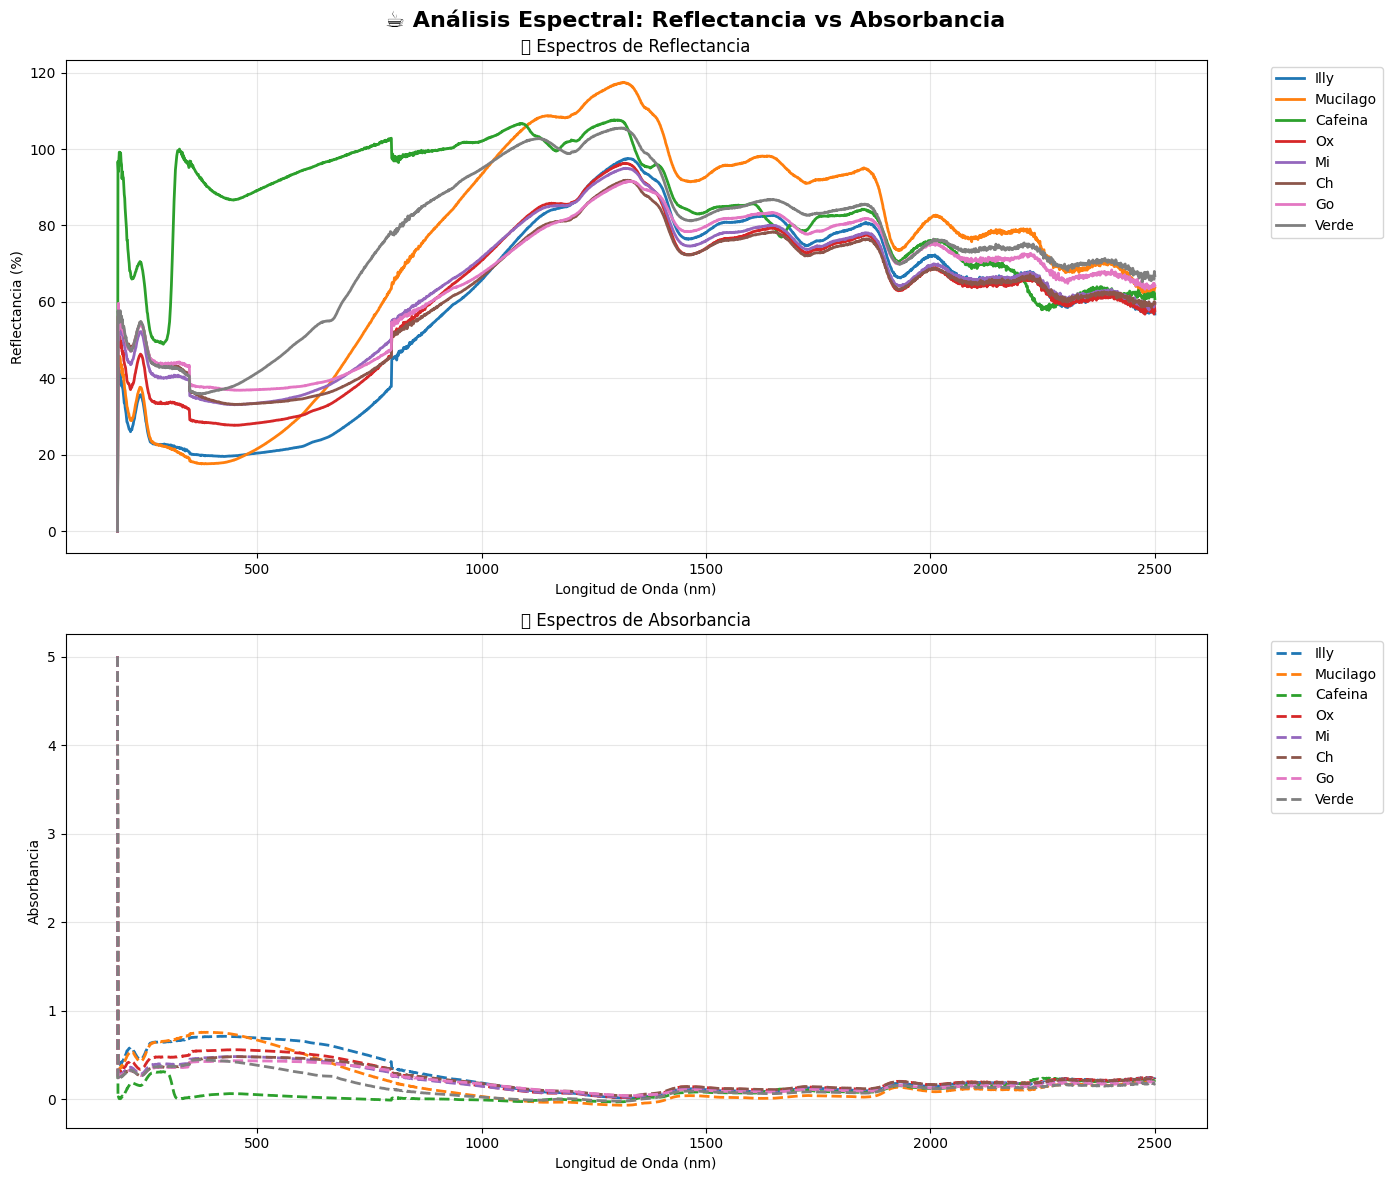

📊 Gráfica comparativa creada


In [8]:
# Comparación Reflectancia vs Absorbancia (subplots)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Subplot 1: Reflectancia
for i, col in enumerate(nombre_col):
    ax1.plot(file2['Wavelength'], file2[col], 
             label=col, color=colors[i], linewidth=2)

ax1.set_xlabel('Longitud de Onda (nm)')
ax1.set_ylabel('Reflectancia (%)')
ax1.set_title('📊 Espectros de Reflectancia')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Subplot 2: Absorbancia
for i, col in enumerate(nombre_col):
    ax2.plot(file_abs['Wavelength'], file_abs[col], 
             label=col, color=colors[i], linewidth=2, linestyle='--')

ax2.set_xlabel('Longitud de Onda (nm)')
ax2.set_ylabel('Absorbancia')
ax2.set_title('🔬 Espectros de Absorbancia')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

plt.suptitle('☕ Análisis Espectral: Reflectancia vs Absorbancia', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("📊 Gráfica comparativa creada")

In [9]:
# Estadísticas básicas
print("📊 ESTADÍSTICAS DE REFLECTANCIA:")
print("=" * 50)
print(file2[nombre_col].describe().round(2))

print("\n\n🔬 ESTADÍSTICAS DE ABSORBANCIA:")
print("=" * 50)
print(file_abs[nombre_col].describe().round(3))

📊 ESTADÍSTICAS DE REFLECTANCIA:
          Illy  Mucilago  Cafeina       Ox       Mi       Ch       Go    Verde
count  2312.00   2312.00  2312.00  2312.00  2312.00  2312.00  2312.00  2312.00
mean     60.03     73.43    85.06    61.96    64.11    62.42    65.94    75.00
std      23.75     29.27    15.31    19.61    17.54    16.53    16.74    19.10
min       0.00      0.00     0.00     0.00     0.00     0.00     0.00     0.00
25%      35.68     57.31    72.61    45.02    49.62    51.04    51.16    67.35
50%      66.07     78.35    85.46    64.74    66.31    65.20    70.78    75.66
75%      78.89     94.90    99.14    76.42    77.39    75.12    79.90    86.36
max      97.54    117.50   107.64    96.31    95.00    91.86    91.63   105.52


🔬 ESTADÍSTICAS DE ABSORBANCIA:
           Illy  Mucilago   Cafeina        Ox        Mi        Ch        Go  \
count  2312.000  2312.000  2312.000  2312.000  2312.000  2312.000  2312.000   
mean      0.271     0.188     0.080     0.236     0.214     0.224 

In [10]:
# Análisis de correlación
print("🔍 ANÁLISIS DE CORRELACIÓN:")
print("=" * 40)

# Calcular correlaciones para cada muestra
correlaciones = {}
for col in nombre_col:
    # Filtrar valores válidos
    mask = (file2[col] > 0) & (file_abs[col].notna())
    if mask.sum() > 10:  # Al menos 10 puntos válidos
        corr = np.corrcoef(file2[col][mask], file_abs[col][mask])[0,1]
        correlaciones[col] = corr
        print(f"{col:10}: r = {corr:.3f}")

# Correlación promedio
if correlaciones:
    corr_promedio = np.mean(list(correlaciones.values()))
    print(f"\n📈 Correlación promedio: {corr_promedio:.3f}")
    print("   (Valores cercanos a -1 indican correlación negativa fuerte)")

🔍 ANÁLISIS DE CORRELACIÓN:
Illy      : r = -0.919
Mucilago  : r = -0.917
Cafeina   : r = -0.712
Ox        : r = -0.873
Mi        : r = -0.837
Ch        : r = -0.830
Go        : r = -0.823
Verde     : r = -0.819

📈 Correlación promedio: -0.841
   (Valores cercanos a -1 indican correlación negativa fuerte)


In [11]:
# Guardar resultados
try:
    # Guardar datos procesados
    file2.to_csv('datos_reflectancia_procesados.csv', index=False)
    file_abs.to_csv('datos_absorbancia_calculados.csv', index=False)
    
    print("✅ ARCHIVOS GUARDADOS:")
    print("   📄 datos_reflectancia_procesados.csv")
    print("   📄 datos_absorbancia_calculados.csv")
    
except Exception as e:
    print(f"⚠️ Error al guardar: {e}")

✅ ARCHIVOS GUARDADOS:
   📄 datos_reflectancia_procesados.csv
   📄 datos_absorbancia_calculados.csv


## 📋 Resumen del Análisis

### ✅ Análisis Completado
- **Muestras analizadas:** 8 tipos de café
- **Conversión:** Reflectancia → Absorbancia usando A = 2 - log₁₀(R)
- **Gráficas generadas:** Espectros individuales y comparativos
- **Estadísticas:** Descriptivas y correlaciones

### 🎯 Archivos Generados
- `datos_reflectancia_procesados.csv`
- `datos_absorbancia_calculados.csv`

---
**📅 Fecha:** 12 Enero 2025  
**🏷️ Versión:** CafeLab Simple v1.0